In [1]:
#!pip install transformers 


In [4]:
import pandas as pd
import nltk
import tweepy
import csv

In [3]:
auth = tweepy.OAuthHandler("PAjwwvpWMw9l308c5I7LTWiAU", 
    "i666c0iZSsVnFPM6OowjWAsW4j3NGtcU3SXl0B8Ev96kA2uxDk")
auth.set_access_token("1649879424311885824-QJSQCgLX3UPETwrGV01thFS9ug6Vq5", 
    "80xPQa5TdgA6OenzxAzDyu0XkpakWNL7V31LRRirTAIlg")

api = tweepy.API(auth)

try:
    api.verify_credentials()
    print("Authentication OK")
except:
    print("Error during authentication")

Authentication OK


In [ ]:
hashtags = ["#usf","#BullPride","#USF","#usfbulls","#USFGives","#HornsUp","#ComeToTheBay","#ComeToTheBay","#StayInTheBay","#ProBulls","#USFalumni","#GoBulls","#USFBookstore","#ProBulls","#USFalumni","#BucStrong"]
uniquetweetlist=set()
tweetlist=set()
for hashtag in hashtags:
    for tweet in tweepy.Cursor(api.search_tweets, q=hashtag, lang="en", tweet_mode="extended").items(2000):
        if tweet.full_text not in tweetlist:
            uniquetweetlist.add(tweet)
            tweetlist.add(tweet.full_text)
len(uniquetweetlist)

In [ ]:
with open(f"USFFinalDataset.csv", "w", newline="", encoding="utf-8") as file:
    writer = csv.writer(file)
    writer.writerow(["Text", "User", "Date", "Time"])
    for eachtweet in uniquetweetlist:
        writer.writerow([eachtweet.full_text, eachtweet.user.screen_name, eachtweet.created_at.date(), eachtweet.created_at.time()])

<b>Data Reading</b>

In [5]:
datafile = pd.read_csv('USFFinalDataset.csv',encoding='iso-8859-1')
datafile.head()

,Text,User,Date,Time,Original Text,Sentiment Value,Sentiment
0,spruce creek 2025 dl derry norris lands offer,ChrisBoyleDBNJ,03-05-2023,17:54:07,Spruce Creek 2025 DL Derry Norris lands an off...,0,neutral
1,ranked 14th among american public research uni...,USFResearch,03-05-2023,16:24:29,RT @USFHealth: .@USouthFlorida ranked 14th amo...,0,neutral
2,russell warrior game amazing niece always took...,BillHudgens2,03-05-2023,15:53:11,RT @Karen_Russell: @VP @SecondGentleman I was ...,1,positive
3,congratulations usf pasco pds network teacher ...,CountOnColleen,03-05-2023,15:18:31,RT @educationUSF: Congratulations to our USF/P...,1,positive
4,ranked 14th among american public research uni...,USFHealth,03-05-2023,14:30:29,.@USouthFlorida ranked 14th among American pub...,1,positive


In [6]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1722 entries, 0 to 1721
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Text             1722 non-null   object
 1   User             1722 non-null   object
 2   Date             1722 non-null   object
 3   Time             1722 non-null   object
 4   Original Text    1722 non-null   object
 5   Sentiment Value  1722 non-null   int64 
 6   Sentiment        1722 non-null   object
dtypes: int64(1), object(6)
memory usage: 94.3+ KB


In [7]:
datafile.shape

(1722, 7)

In [8]:
datafile['Text'][3]

'congratulations usf pasco pds network teacher leader academy coho 4 graduates excited see amaz'

<b>Data Preprocessing</b>

In [9]:
import re
from nltk.corpus import stopwords
def preprocess_text(text):
    text = text.lower()
    text = re.compile(r'https?://\S+|www\.\S+|@[A-Za-z0-9]+|#[A-Za-z0-9]+|rt').sub('', text)
    text = re.sub('[^a-z A-Z]+', ' ', text)
    text = text.strip()
    text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return ''.join(text)
stop_words = set(stopwords.words('english'))
datafile['Text'] = datafile['Text'].astype(str).apply(preprocess_text)

In [10]:
datafile['Text'][3]

'congratulations usf pasco pds network teacher leader academy coho graduates excited see amaz'

<b>Feature Extraction</b>

In [11]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(datafile['Text'])
word_counts = X.toarray()
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(word_counts)
print("Word counts matrix:", X)
print("TF-IDF matrix:", tfidf)


Word counts matrix:   (0, 3040)	1
  (0, 786)	1
  (0, 922)	1
  (0, 877)	1
  (0, 2209)	1
  (0, 1808)	1
  (0, 2230)	1
  (1, 2582)	1
  (1, 3218)	2
  (1, 118)	1
  (1, 116)	1
  (1, 2531)	1
  (1, 2680)	1
  (1, 3379)	1
  (1, 3564)	1
  (1, 1301)	1
  (1, 2179)	1
  (1, 2343)	1
  (1, 1978)	1
  (2, 2775)	1
  (2, 3471)	1
  (2, 1285)	1
  (2, 111)	1
  (2, 2189)	1
  (2, 109)	1
  :	:
  (1719, 2602)	1
  (1719, 3308)	1
  (1720, 448)	1
  (1720, 2075)	1
  (1720, 2508)	1
  (1720, 120)	1
  (1720, 2298)	1
  (1720, 805)	1
  (1720, 2295)	1
  (1720, 1251)	1
  (1720, 3475)	1
  (1720, 13)	1
  (1720, 164)	1
  (1721, 3477)	1
  (1721, 45)	1
  (1721, 2729)	1
  (1721, 1022)	1
  (1721, 2383)	1
  (1721, 2808)	1
  (1721, 2939)	1
  (1721, 3499)	1
  (1721, 2384)	1
  (1721, 2218)	1
  (1721, 3353)	1
  (1721, 3146)	1
TF-IDF matrix:   (0, 3040)	0.4073063233295028
  (0, 2230)	0.2474783589595487
  (0, 2209)	0.4073063233295028
  (0, 1808)	0.37091825093266756
  (0, 922)	0.37091825093266756
  (0, 877)	0.4073063233295028
  (0, 786)	0.

In [13]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer
model_name = "cardiffnlp/twitter-roberta-base-sentiment"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)
def sentiment_prediction(tweet):
    print(tweet)
    inputs = tokenizer(tweet, padding=True, truncation=True, max_length=512, return_tensors="pt")
    outputs = model(**inputs)
    label = outputs.logits.argmax().item() - 1
    return label

In [ ]:
datafile['Sentiment Value'] = datafile['Text'].apply(lambda x: sentiment_prediction(x[:512]))


In [ ]:
#datafile.to_csv('USFFinalDataset.csv')

<b>Model Training</b>

In [14]:
sentiment_counts = datafile['Sentiment Value'].value_counts(normalize=True) * 100
print(sentiment_counts)

 0    59.001161
 1    36.817654
-1     4.181185
Name: Sentiment Value, dtype: float64


In [38]:
from sklearn.model_selection import train_test_split
datafile = datafile.sample(frac=1).reset_index(drop=True)
X_train, X_test, y_train, y_test = train_test_split(datafile['Text'], datafile['Sentiment Value'], test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

new_df = pd.DataFrame(columns=['Text', 'Sentiment Value'])

for index, row in datafile.iterrows():
    if row['Sentiment Value'] == -1:
        if row['Text'] not in X_train:
            new_row = {'Text': row['Text'], 'Sentiment Value': row['Sentiment Value']}
            new_df = new_df.append(new_row, ignore_index=True)

X_train = pd.concat([X_train, new_df['Text']], ignore_index=True)
y_train = pd.concat([y_train, new_df['Sentiment Value']], ignore_index=True)

print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)


X_train shape:  (1377,)
y_train shape:  (1377,)
X_test shape:  (345,)
y_test shape:  (345,)
X_train shape:  (1449,)
y_train shape:  (1449,)
X_test shape:  (345,)
y_test shape:  (345,)


C:\Users\bnikh\AppData\Local\Temp\ipykernel_7284\3180724024.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bnikh\AppData\Local\Temp\ipykernel_7284\3180724024.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bnikh\AppData\Local\Temp\ipykernel_7284\3180724024.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bnikh\AppData\Local\Temp\ipykernel_7284\3180724024.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

C:\Users\bnikh\AppData\Local\Temp\ipykernel_7284\3180724024.py:16: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat 

In [39]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Conv1D, MaxPooling1D, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report


np.random.seed(42)
y_train = y_train.to_numpy()
y_test = y_test.to_numpy()

tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)


maxlen = 100
X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)
print('X_train shape: ', X_train.shape)
print('y_train shape: ', y_train.shape)
print('X_test shape: ', X_test.shape)
print('y_test shape: ', y_test.shape)

X_train shape:  (1449, 100)
y_train shape:  (1449,)
X_test shape:  (345, 100)
y_test shape:  (345,)


In [40]:
X_train = X_train.astype('float32')
y_train = y_train.astype('float32')

In [41]:
from tensorflow.keras import regularizers
model = Sequential()
model.add(Embedding(5000, 128, input_length=maxlen))
model.add(Conv1D(128, 5, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model.add(Dropout(0.7))
model.add(MaxPooling1D(pool_size=6))
model.add(GRU(80, return_sequences=True)) 
model.add(LSTM(36))
model.add(Dropout(0.5))
model.add(Dense(6, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(np.array(X_train), y_train, epochs=25, batch_size=32, validation_data=(np.array(X_test), y_test))


Epoch 1/25
46/46 [==============================] - 7s 64ms/step - loss: 1.2012 - accuracy: 0.5535 - val_loss: 0.8007 - val_accuracy: 0.6000
Epoch 2/25
46/46 [==============================] - 2s 46ms/step - loss: 0.6645 - accuracy: 0.5583 - val_loss: 0.6315 - val_accuracy: 0.6000
Epoch 3/25
46/46 [==============================] - 2s 46ms/step - loss: 0.5983 - accuracy: 0.5583 - val_loss: 0.6584 - val_accuracy: 0.6000
Epoch 4/25
46/46 [==============================] - 2s 46ms/step - loss: 0.5702 - accuracy: 0.5659 - val_loss: 0.4868 - val_accuracy: 0.7304
Epoch 5/25
46/46 [==============================] - 2s 47ms/step - loss: -0.0179 - accuracy: 0.8019 - val_loss: 0.0339 - val_accuracy: 0.8667
Epoch 6/25
46/46 [==============================] - 2s 46ms/step - loss: -0.6810 - accuracy: 0.8730 - val_loss: -0.1409 - val_accuracy: 0.8116
Epoch 7/25
46/46 [==============================] - 2s 46ms/step - loss: -1.3042 - accuracy: 0.8806 - val_loss: -0.1990 - val_accuracy: 0.8696
Epoch 8/

In [42]:
train_loss, train_acc = model.evaluate(X_train, y_train)
print('Train loss:', train_loss)
print('Train accuracy:', train_acc)

46/46 [==============================] - 1s 12ms/step - loss: -23.2992 - accuracy: 0.9061
Train loss: -23.29922103881836
Train accuracy: 0.9061421751976013


In [43]:
x=model.evaluate(X_test, y_test)

11/11 [==============================] - 0s 11ms/step - loss: -6.7465 - accuracy: 0.8638


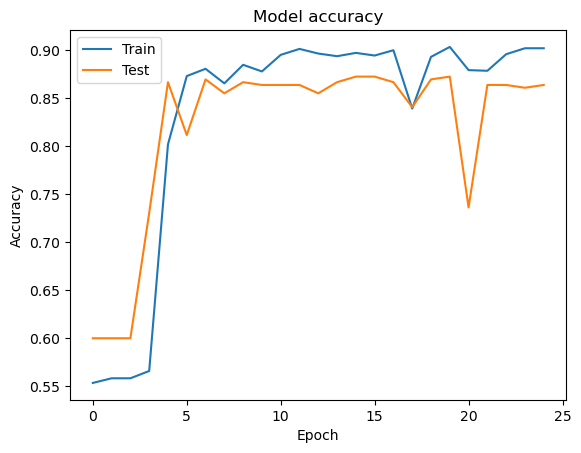

In [50]:
import matplotlib.pyplot as mpt

mpt.plot(history.history['accuracy'])
mpt.plot(history.history['val_accuracy'])
mpt.title('Model accuracy')
mpt.ylabel('Accuracy')
mpt.xlabel('Epoch')
mpt.legend(['Train', 'Test'], loc='upper left')
mpt.show()


<b>Model Evaluation</b>

In [52]:
from sklearn.metrics import *
y_pred_proba = model.predict(np.array(X_test))
y_pred = np.round(y_pred_proba)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Accuracy: {:.2f}%".format(accuracy*100))
print("Precision: {:.2f}%".format(precision*100))
print("Recall: {:.2f}%".format(recall*100))
print("F1-score: {:.2f}%".format(f1*100))


11/11 [==============================] - 0s 11ms/step
Accuracy: 86.38%
Precision: 81.98%
Recall: 86.38%
F1-score: 84.03%


C:\Users\bnikh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning:

Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print(cm)

sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()


NameError: name 'y_test' is not defined

In [49]:
sentences = [
    "it is raining",
    "I love going to USF games, it's so much fun!", 
    "the campus is peaceful in USF",
    "I can't wait for the semester to be over, it's been so stressful",
    "USF's campus is beautiful, especially during the winter",
    "I had a great time at the USF orientation, it was very informative",
    "i lost my interest in joining this university",
    "I'm disappointed with the quality of education at USF, it's not what I expected",
    "I'm so proud to be a USF Bull!",
    "usf ranks 14th in US rankings",
    "usf is famous for games"
   ]

processed_sentences = [preprocess_text(sentence) for sentence in sentences]

sequence_lengths = [len(sequence.split()) for sequence in processed_sentences]
tokenized_sentences = tokenizer.texts_to_sequences(processed_sentences)
padded_sentences = pad_sequences(tokenized_sentences, padding='post', maxlen=100)

predictions = model.predict(padded_sentences)
labels = np.round(predictions).astype(int)

for i in range(len(sentences)):
    if(predictions[i][0]<0.5 and predictions[i][0]>0.0 ):
        print(sentences[i])
        print(predictions[i][0])
        print("Negative")
    elif (predictions[i][0]>0.5):
        print(sentences[i])
        print(predictions[i][0])
        print("Positive")
    elif (predictions[i][0]==0.0):
        print(sentences[i])
        print(predictions[i][0])
        print("Neutral")
    print()


1/1 [==============================] - 0s 40ms/step
it is raining
0.0
Neutral

I love going to USF games, it's so much fun!
0.9925699
Positive

the campus is peaceful in USF
0.0
Neutral

I can't wait for the semester to be over, it's been so stressful
0.31482998
Negative

USF's campus is beautiful, especially during the winter
0.94054645
Positive

I had a great time at the USF orientation, it was very informative
0.9931116
Positive

i lost my interest in joining this university
0.31482998
Negative

I'm disappointed with the quality of education at USF, it's not what I expected
0.33064747
Negative

I'm so proud to be a USF Bull!
0.80014384
Positive

usf ranks 14th in US rankings
0.99236524
Positive

usf is famous for games
0.0
Neutral

